# Exploratory Data Analysis

#### Import Libraries

In [1]:
# For simplicity, I start by importing libraries I will be using at the beginning, data viz libraries will be imported later

import pandas as pd
import numpy as np

#### We will load the data set

In [2]:
# This code is storing our file path in the Data variable. If we want to create more variables and start with a fresh data set
# we can do so by created a new variable and using the same code
# We will be manipulatng 'data' so everytime we call that variable, it will store all of our changes

filepath = 'Air_Traffic_Passenger_Statistics_20240724.csv'
data = pd.read_csv(filepath)

#### View the head to see what our data looks like

In [3]:
data.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM


#### Right away we can see some null values in our dataset.
#### These will be fixed by manipulating the dataset via python.
#### This can be cleaned via excel to begin with, but for our purposes, I will do it all on python.

## Data Cleaning

#### We will start with viewing null values, the statistics, and the object type.

In [4]:
data.isnull().sum()

Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    316
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64

In [5]:
data.describe()

,Activity Period,Passenger Count
count,36165.000000,36165.000000
mean,201206.636416,27894.875128
std,724.614553,62489.937525
min,199907.000000,0.000000
25%,200605.000000,4401.000000
50%,201210.000000,8620.000000
75%,201809.000000,19841.000000
max,202405.000000,856501.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36165 entries, 0 to 36164
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              36165 non-null  int64 
 1   Activity Period Start Date   36165 non-null  object
 2   Operating Airline            36165 non-null  object
 3   Operating Airline IATA Code  35849 non-null  object
 4   Published Airline            36165 non-null  object
 5   Published Airline IATA Code  35849 non-null  object
 6   GEO Summary                  36165 non-null  object
 7   GEO Region                   36165 non-null  object
 8   Activity Type Code           36165 non-null  object
 9   Price Category Code          36165 non-null  object
 10  Terminal                     36165 non-null  object
 11  Boarding Area                36165 non-null  object
 12  Passenger Count              36165 non-null  int64 
 13  data_as_of                   36

#### Majority of our data are 'objects.' Intuitively, we can estimate that converting object to int for some columns will be usless. 

#### I would like to view null values by Operating Airline, this would help us fill the missing values quicker.

In [7]:
# Filter rows where Operating value is null 

null_values_operating = data[data['Operating Airline IATA Code'].isnull()]
null_count_by_operating = null_values_operating['Operating Airline'].unique()
print(null_count_by_operating)

['Aeroflot Russian International Airlines' 'China Eastern Airlines, Inc'
 'Sobelair Airlines' 'Sports Jet' 'North American Airlines' 'Sports Hawk'
 'Allegro Airlines' 'DB Air' 'Boeing Company' 'Servisair'
 'Pacific Aviation' 'Swissport USA' 'Trego Dugan Aviation'
 'Air Italy S.P.A' 'El Al Israel Airlines LTD.'
 'Norwegian Air Shuttle ASA' 'Samsic Airport America, LLC']


In [8]:
# Do the same for 'Published Airline'

null_values_published = data[data['Published Airline IATA Code'].isnull()]
null_count_by_published = null_values_published['Published Airline'].unique()
print(null_count_by_published)

['Aeroflot Russian International Airlines' 'China Eastern Airlines, Inc'
 'Sobelair Airlines' 'Sports Jet' 'North American Airlines' 'Sports Hawk'
 'Allegro Airlines' 'DB Air' 'Boeing Company' 'Servisair'
 'Pacific Aviation' 'Swissport USA' 'Trego Dugan Aviation'
 'Air Italy S.P.A' 'El Al Israel Airlines LTD.'
 'Norwegian Air Shuttle ASA' 'Samsic Airport America, LLC']


#### Before we add values to these null rows, I also want to see if published IATA airline code and Operating Airline IATA code are the same, if so, we will drop one of them as it is not needed. 

In [9]:
same_values = data['Published Airline IATA Code'].equals(data['Operating Airline IATA Code'])

if same_values:
    print('Values are the same')
else:
    print('Unique columns')

Unique columns


#### We know that Published Airline Code and Operating Airline Code are differentiated as indicated on the source. However, both values were missing the same amount so it is good to verify. Let's fill up the IATA code for airlines with null values. 

In [10]:
# Start with a dictionary since we need to map values to a particular key 

iata_operating_map = {
    'Aeroflot Russian International Airlines': 'SU',
    'China Eastern Airlines, Inc': 'MU',
    'Sobelair Airlines': 'Q7',
    'Sports Jet': 'SJ',
    'North American Airlines': 'NA',
    'Sports Hawk': 'SH',
    'Allegro Airlines': 'AL', 
    'DB Air': 'DB', 
    'Boeing Company': 'BO',
    'Servisair': 'SV',
    'Pacific Aviation': 'BL',
    'Swissport USA': 'SW',
    'Trego Dugan Aviation': 'TD',
    'Air Italy S.P.A': 'IG',
    'El Al Israel Airlines LTD.': 'LY',
    'Norwegian Air Shuttle ASA': 'DY',
    'Samsic Airport America, LLC': 'SA',
    
}

# We will create a function to fill both null columns
# Please note: I googled all of the IATA codes, but some I had to guess on as google did not return all results

def fill_iata_code(row):
    if pd.isnull(row['Operating Airline IATA Code']):
        row['Operating Airline IATA Code'] = iata_operating_map.get(row['Operating Airline'], None)
    if pd.isnull(row['Published Airline IATA Code']):
        row['Published Airline IATA Code'] = iata_operating_map.get(row['Published Airline'], None)
    return row

data = data.apply(fill_iata_code, axis=1)

In [11]:
# In the data head, we saw some null objects. Lets run it again and see if it worked. 

data.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,SU,Aeroflot Russian International Airlines,SU,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,SU,Aeroflot Russian International Airlines,SU,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024/06/20 01:00:26 PM,2024/07/22 03:01:47 PM


In [12]:
# We can see our code was successful! To be sure, lets run the null test again.

data.isnull().sum()

Activity Period                0
Activity Period Start Date     0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
data_as_of                     0
data_loaded_at                 0
dtype: int64

#### We can covert Activity period start date to a date format since it is an 'object' dtype

In [13]:
print(data.dtypes)

Activity Period                 int64
Activity Period Start Date     object
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
data_as_of                     object
data_loaded_at                 object
dtype: object


In [14]:
data['Activity Period Start Date'] = pd.to_datetime(data['Activity Period Start Date'])
print('Updated Data Types: ')
print(data.dtypes)

Updated Data Types: 
Activity Period                         int64
Activity Period Start Date     datetime64[ns]
Operating Airline                      object
Operating Airline IATA Code            object
Published Airline                      object
Published Airline IATA Code            object
GEO Summary                            object
GEO Region                             object
Activity Type Code                     object
Price Category Code                    object
Terminal                               object
Boarding Area                          object
Passenger Count                         int64
data_as_of                             object
data_loaded_at                         object
dtype: object


#### We can drop data as of, and data loaded at since it is not relevant to our exploration.

In [15]:
if 'data_as_of' in data.columns:
    data.drop(['data_as_of'], axis=1, inplace=True)
if 'data_loaded_at' in data.columns:
    data.drop(['data_loaded_at'], axis=1, inplace=True)
    
# It is not necessary to use an IF statement here, but it works

In [16]:
data.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432
1,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353
2,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518
3,199907,1999-07-01,Aeroflot Russian International Airlines,SU,Aeroflot Russian International Airlines,SU,International,Europe,Deplaned,Other,Terminal 2,D,1324
4,199907,1999-07-01,Aeroflot Russian International Airlines,SU,Aeroflot Russian International Airlines,SU,International,Europe,Enplaned,Other,Terminal 2,D,1198


#### There are PLENTY more items we can manipulate here (such as: converting Terminal to integers, Price category codes can also be presented as a numerical value, etc.)

#### However, what we have is good enough to start generating charts, graphs and visualizing correlation and such.

# Data Visualization

## All time International vs domestic traffic pattern by year

#### Firstly, we need to visualize our data by year, and if we do it now as the data as is, it will be by WHOLE DATE. 
#### This will make our chart too large and long, not all data points can fit.

In [17]:
data['Year'] = data['Activity Period Start Date'].dt.year
yearly_data = data.groupby('Year')['Passenger Count'].sum().reset_index()
print(yearly_data)

    Year  Passenger Count
0   1999         20982632
1   2000         40691441
2   2001         34287324
3   2002         31091334
4   2003         29049728
5   2004         32450507
6   2005         33099210
7   2006         33332970
8   2007         35554082
9   2008         37234678
10  2009         37338942
11  2010         39253999
12  2011         40927786
13  2012         44399885
14  2013         44945760
15  2014         47114631
16  2015         50057887
17  2016         53103448
18  2017         55823712
19  2018         57746873
20  2019         57418574
21  2020         16418713
22  2021         24334553
23  2022         42209058
24  2023         50141567
25  2024         19808865


#### Above, we can see all passengers by the year, but it would be more attractive and readable in a barplot. 

In [18]:
# Import data viz libraries

!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

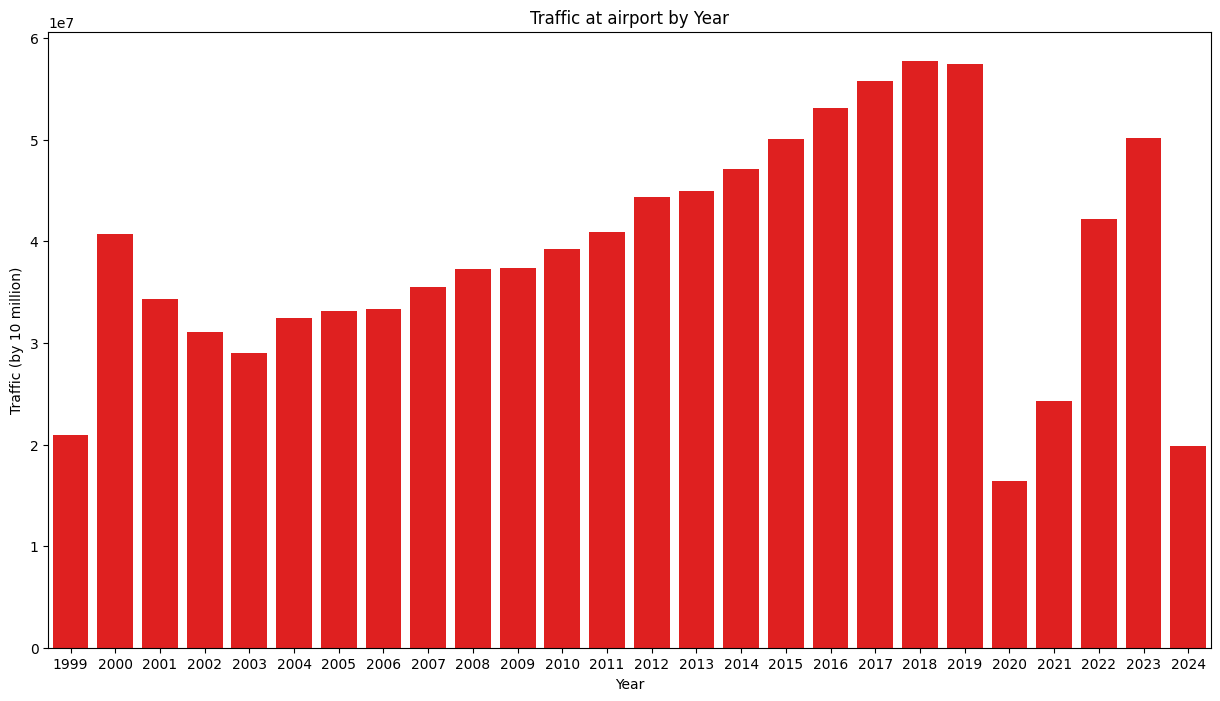

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Year', y = 'Passenger Count', data = yearly_data, color = 'red')
plt.xlabel('Year')
plt.ylabel('Traffic (by 10 million)')
plt.title('Traffic at airport by Year')
plt.show()

#### From this visualization, we can conclude that prior to 2020, travel trend was on a uptick. However, in 2020, traffic significantly decreased. This is due to COVID-19. As we are currently midway through 2024, the numbers are not definitive and may seem like it is on a downtrend, but the year has to end to be properly assessed.

#### Let's look at international vs domestic. 

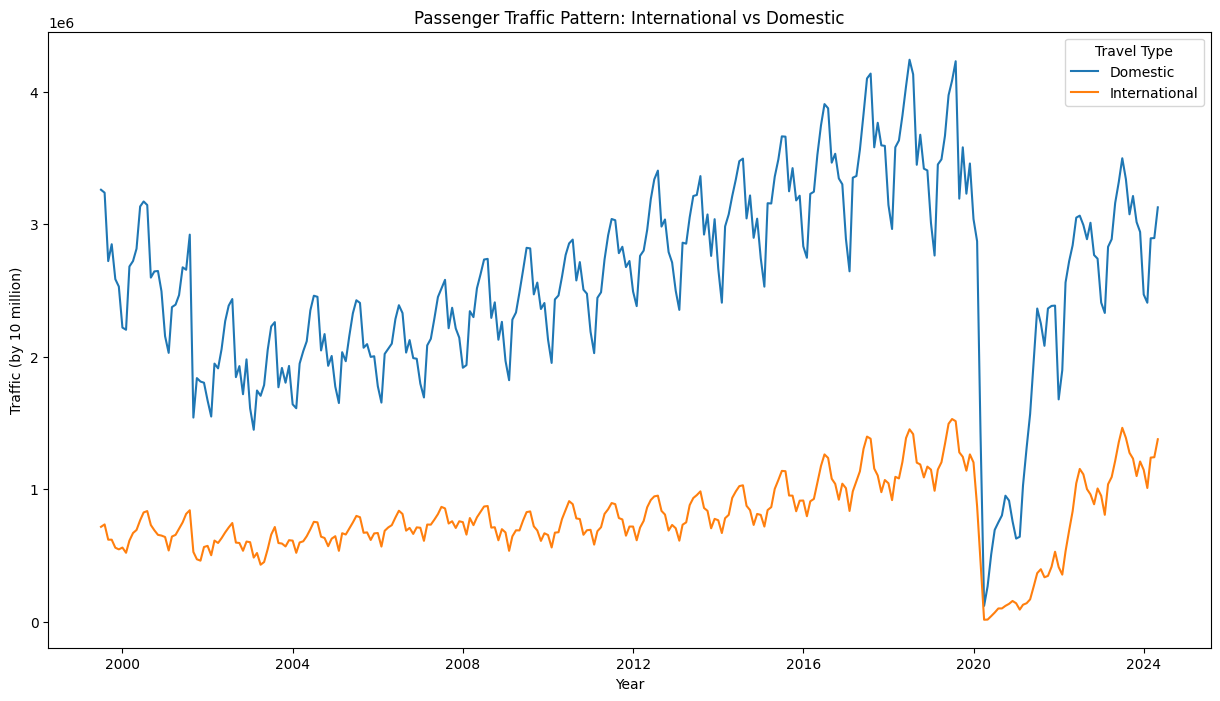

In [30]:
traffic_type = data.groupby(['Activity Period Start Date', 'GEO Summary'])['Passenger Count'].sum().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x = 'Activity Period Start Date', y = 'Passenger Count', data = traffic_type, hue = 'GEO Summary')
plt.xlabel('Year')
plt.ylabel('Traffic (by 10 million)')
plt.title('Passenger Traffic Pattern: International vs Domestic')
plt.legend(title='Travel Type')
plt.show()

#### According to our dataset, 2018 was the busiest travel year. Let's look at how 2018 performed by season. 

In [34]:
# I have already extracted a year column, I will need to extract a month column, and create a function that groups the months by season. 

data['Month'] = data['Activity Period Start Date'].dt.month
data_2018 = data[data['Year'] == 2018]

def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Fall'
    
data_2018['Season'] = data_2018['Month'].apply(get_season)
data_2018.head()


C:\Users\syed_\AppData\Local\Temp\ipykernel_12804\405210156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018['Season'] = data_2018['Month'].apply(get_season)


,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month,Season
25825,201801,2018-01-01,"Aer Lingus, Ltd.",EI,"Aer Lingus, Ltd.",EI,International,Europe,Deplaned,Other,International,G,5050,2018,1,Winter
25826,201801,2018-01-01,"Aer Lingus, Ltd.",EI,"Aer Lingus, Ltd.",EI,International,Europe,Enplaned,Other,International,G,4260,2018,1,Winter
25827,201801,2018-01-01,Aeromexico,AM,Aeromexico,AM,International,Mexico,Deplaned,Other,International,A,14228,2018,1,Winter
25828,201801,2018-01-01,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,12279,2018,1,Winter
25829,201801,2018-01-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,International,G,34523,2018,1,Winter


#### As we can see, we have successfully added seasons to our dataset for the year 2018. 

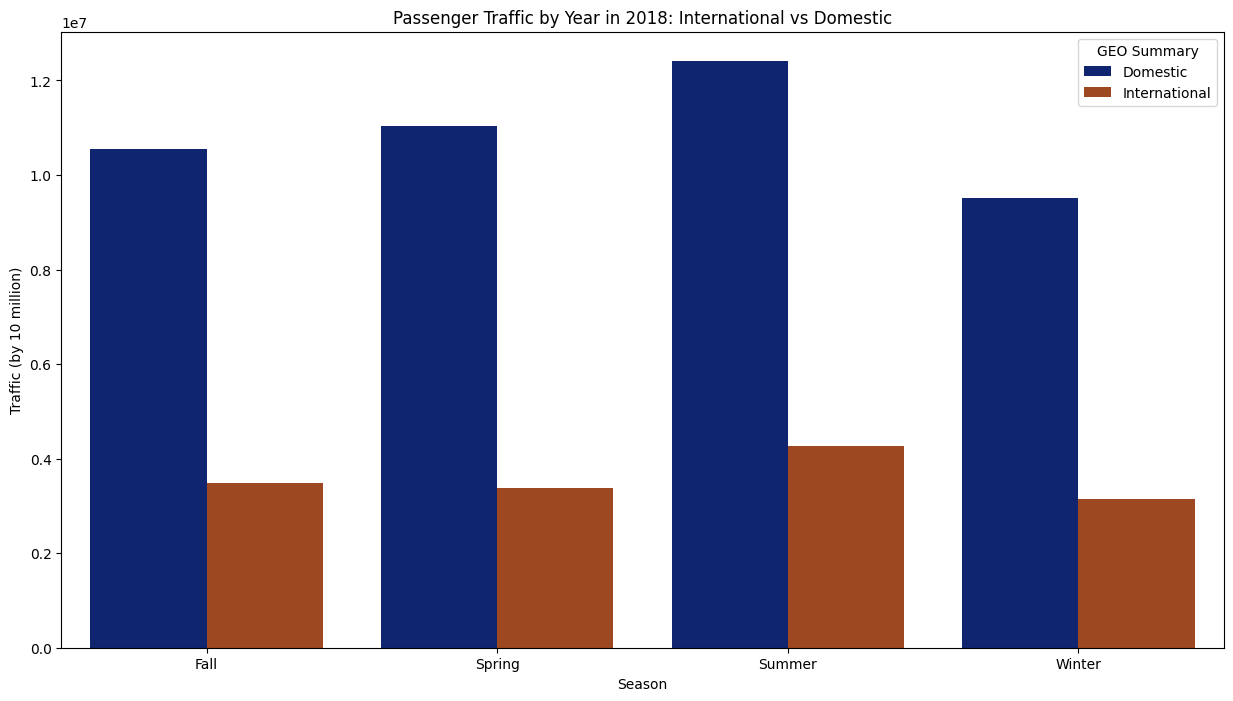

In [41]:
seasonal_traffic_2018 = data_2018.groupby(['Season', 'GEO Summary'])['Passenger Count'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(data = seasonal_traffic_2018, x = 'Season', y = 'Passenger Count', hue = 'GEO Summary', palette='dark')
plt.title('Passenger Traffic by Year in 2018: International vs Domestic')
plt.xlabel('Season')
plt.ylabel('Traffic (by 10 million)')
plt.legend (title = 'GEO Summary')
plt.show()

#### Summer was a great travel season to/from San Francisco in 2018. This data can be further analyzed but I will conclude my findings here. Thank you so much for viewing this, and I hope you enjoy more projects from me!